In [1]:
import nbsetup
import math
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import ensemblepy as ep
import scipy as sp
import matplotlib.pyplot as plt

In [26]:
def mixed(pp, dimensions=1, count=1000):
    p = int(count*(1-pp))
    
    if p == count: 
        return ep.spike(dimensions, count, val=0.5)
    elif p == 0:
        return np.array([np.random.uniform(0,1,count) for _ in range(dimensions)])#ep.dimspace(0,1,count,dimensions,True).T
    else:
        s = ep.spike(dimensions, p, val=0.5)
        u = [np.random.uniform(0,1,count-p) for _ in range(dimensions)]#ep.dimspace(0,1,count-p,dimensions,True).T
        return np.array([np.concatenate([s[d], u[d]]) for d in range(dimensions)])

In [54]:
percent = np.linspace(1,0,20)
dimensions = 10
binrange = (2,5)
data = []
for d in range(1,dimensions):
    for bins in binrange:
        emax = None
        for x in percent:
            dist = mixed(x, d)
            pmf = np.histogramdd(dist.T, bins=bins)[0].flatten()
            ent = sp.stats.entropy(pmf)
            if emax is None: emax = ent
            nent = ent/emax
            dv = ep.density_variance(dist, bounded=False)
            data.append({
                'percent': x,
                'dimension': d,
                'dv': dv,
                'dve': dv*np.log(d+1),
                'nent': nent,
                'ent': ent,
                'bins': bins,
            })
    print(d)

data = pd.DataFrame(data)

1
2
3
4
5
6
7
8
9


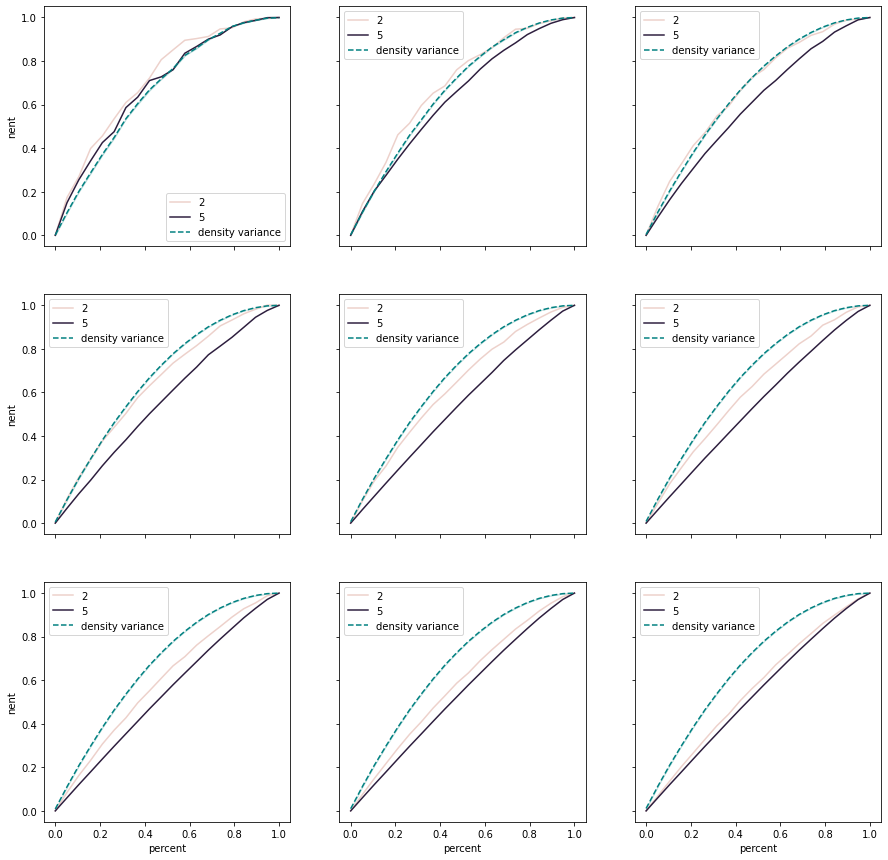

In [55]:
lines = 3
fig, axes = plt.subplots(lines, math.ceil((dimensions-1)/lines), sharex=True, sharey=True, figsize=(15,5*lines))
axes = axes.flatten()
for d in range(1, dimensions):
    df = data[data['dimension']==d]
    sns.lineplot(data=df, x='percent', y='nent', hue='bins', ax=axes[d-1])
    sns.lineplot(data=df, x='percent', y='dv', ax=axes[d-1], label='density variance', linestyle='dashed', color='teal')

[Text(0.5, 1.0, 'Discrete 5 bins per dimension')]

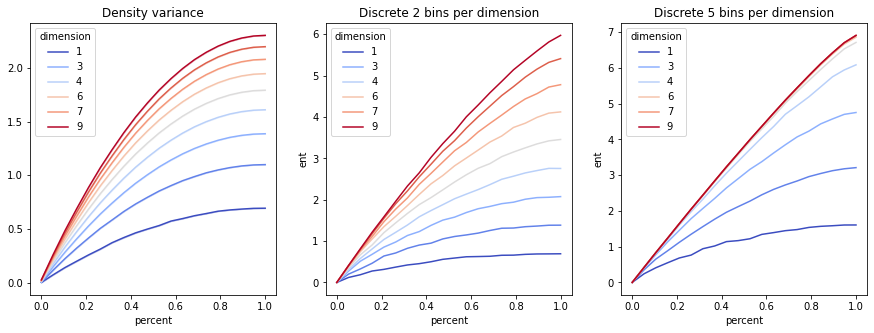

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.lineplot(data=data, x='percent', y='dve', hue='dimension', ax=axes[0], palette='coolwarm').set(ylabel=None, title='Density variance')
sns.lineplot(data=data[data['bins']==2], x='percent', y='ent', hue='dimension', ax=axes[1], palette='coolwarm').set(title='Discrete 2 bins per dimension')
sns.lineplot(data=data[data['bins']==5], x='percent', y='ent', hue='dimension', ax=axes[2], palette='coolwarm').set(title='Discrete 5 bins per dimension')

[Text(0.5, 1.0, 'Discrete 5 bins per dimension')]

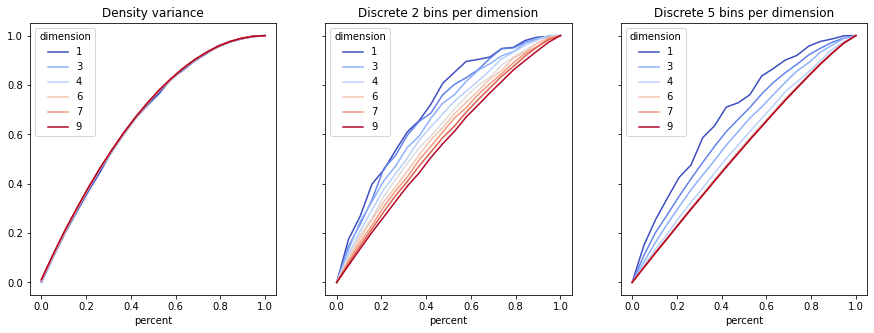

In [57]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,5))
sns.lineplot(data=data, x='percent', y='dv', hue='dimension', ax=axes[0], palette='coolwarm').set(ylabel=None, title='Density variance')
sns.lineplot(data=data[data['bins']==2], x='percent', y='nent', hue='dimension', ax=axes[1], palette='coolwarm').set(title='Discrete 2 bins per dimension')
sns.lineplot(data=data[data['bins']==5], x='percent', y='nent', hue='dimension', ax=axes[2], palette='coolwarm').set(title='Discrete 5 bins per dimension')